##### Imported Required Libiraries

In [28]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Database connection

In [29]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=ENRIQUE_PC;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [30]:
cursor = conn.cursor()

##### SQL query

In [31]:
#query = 'SELECT P.BusinessEntityID, P.FirstName, P.LastName, E.JobTitle, E.VacationHours, S.Bonus FROM Person.Person as P INNER JOIN HumanResources.Employee AS E ON P.BusinessEntityID = E.BusinessEntityID INNER JOIN Sales.SalesPerson AS S ON E.BusinessEntityID = S.BusinessEntityID'
query = 'SELECT * FROM VacationHoursBonus;'

##### Execute SQL query and store the result in a DataFrame

In [32]:
salesdata = pd.read_sql(query, conn)

C:\Users\eagua\AppData\Local\Temp\ipykernel_27952\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


##### Print the DataFrame

In [33]:
salesdata.head()

,BusinessEntityID,FirstName,LastName,JobTitle,VacationHours,Bonus
0,274,Stephen,Jiang,North American Sales Manager,14,0.0
1,275,Michael,Blythe,Sales Representative,38,4100.0
2,276,Linda,Mitchell,Sales Representative,27,2000.0
3,277,Jillian,Carson,Sales Representative,24,2500.0
4,278,Garrett,Vargas,Sales Representative,33,500.0


##### Close the cursor and connection

In [34]:
cursor.close()
conn.close()

##### Plotting with Seaborn

In [35]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

##### Create scatter plot with gradient colors based on 'Vacation hours' and 'Bonus'

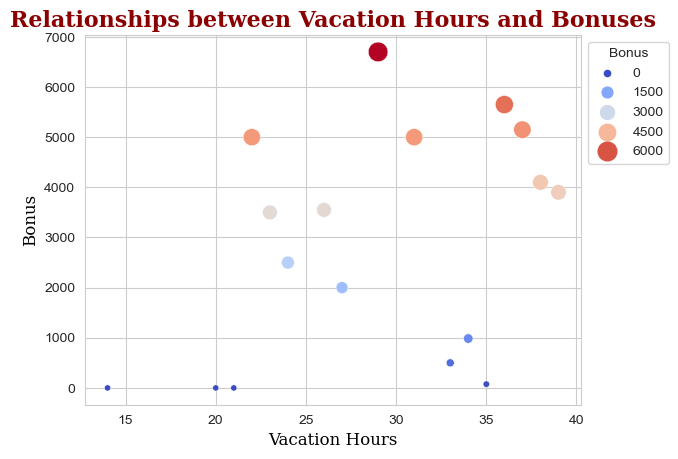

In [36]:
sns.scatterplot(x='VacationHours', y='Bonus', data=salesdata, hue='Bonus', palette='coolwarm', size='Bonus', sizes=(20, 200))
title_font = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 16,}
label_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 12,}
plt.title('Relationships between Vacation Hours and Bonuses', fontdict=title_font)
plt.xlabel('Vacation Hours', fontdict=label_font)
plt.ylabel('Bonus', fontdict=label_font)
plt.legend(title='Bonus', bbox_to_anchor=(1, 1), loc='upper left')
sns.set_style('whitegrid')
plt.show()